# Content Moderation System | Image Moderation | Convolutional Neural Network | ITsolera PVT | Project 1 | Classifying Images as Safe (0) or Violent (1)

## Importing Necessory Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import PIL
import os
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm , classification_report as cr
import tensorflow_hub as hub
import PIL
import random

## Download Pre Trained Model Mobile_V2_Net from Keras application | Transfer Learning

In [ ]:
Mob_V2_Net=keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layers in Mob_V2_Net.layers:  # Freeze all Trainable Layers
  layers.trainable=False

9406464/9406464 [==============================] - 0s 0us/step


## Define a Augmentation Layer To reduce OverFitting

In [ ]:
data_augmentation=keras.Sequential([
    keras.layers.RandomRotation(0.2), # RandomRotatiion
])

In [ ]:
augment=data_augmentation(Mob_V2_Net.output) # First layer OF augmentation after PreTrained model layers
drop=keras.layers.Dropout(0.2)(augment)      # DropOut Layer to avoid overfittin
x=keras.layers.Flatten()(drop)               # Flatten Layer to flatten image
prediction=keras.layers.Dense(1,activation='sigmoid')(x) # Final Output Dense layer Having One Neuron and activation is sigmoid
model=keras.models.Model(inputs=Mob_V2_Net.input,outputs=prediction) # Define Model with input and output layer
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # Compile Model | Optimizer : Adam
                                                                                                # loss : Binary Crossentropy (binary Classification)
                                                                                                # Metrics : Accuracy
model.summary() # Model Summary

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
from google.colab import drive # Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Image Preprocessing

In [ ]:
data_url="/content/drive/MyDrive/ITSOLERA_Internship_CNN/Dataset/Dataset-CMS"
data_dir=pathlib.Path(data_url)

## Define a dictionary contain all the paths of Safe and Violent Images

In [ ]:
image_dict={
    'Safe':list(data_dir.glob("Safe/*"))[:3500], # Safe Images Path List
    'Violent':list(data_dir.glob("Violent/*"))[:3500], # Violent Images Path List
}
labels_dict={
    'Safe':0, # Safe Images Label
    'Violent':1, # Violent Images Label
}

## Extracting all the Image path and open with Pillow to convert them into numpy array and append them in X list and Labels in Y list

In [31]:
x=[]
y=[]
for label_name , images in image_dict.items():
    for image in images:
        img = PIL.Image.open(image).convert('RGB')
        img_array = np.array(img)
        x.append(img_array)
        y.append(labels_dict[label_name])

## Plot a Pie Chart to analyze the distribution of safe and Violent Images

Text(0.5, 1.0, 'Distribution Between the Classes')

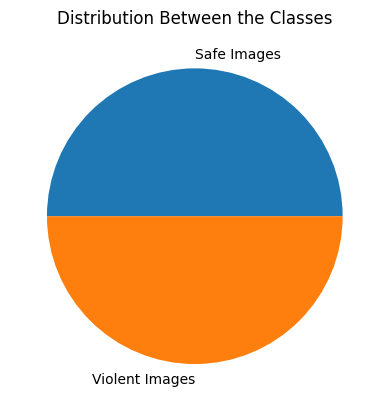

In [ ]:
safe=len(image_dict['Safe'])
violent=len(image_dict['Violent'])
plt.pie([safe,violent],labels=['Safe Images','Violent Images'])
plt.title("Distribution Between the Classes")

## Convert Images list Into numpy array

In [32]:
y=np.array(y)
x=np.array(x)
x.shape,y.shape

((6999, 224, 224, 3), (6999,))

## Data Visualization | Plotting some of the Safe Pictures

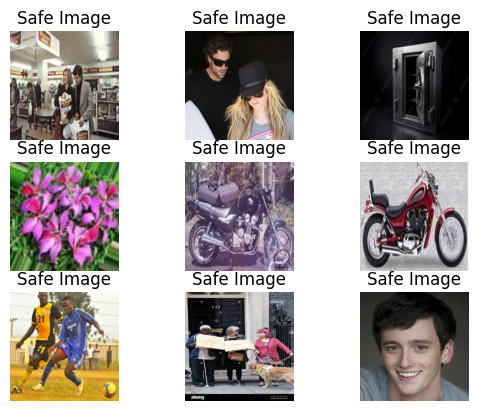

In [ ]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x[random.randint(1,3500)])
  plt.axis('off')
  plt.title("Safe Image")

## Data visualization | Plotting some of the Violent Pictures

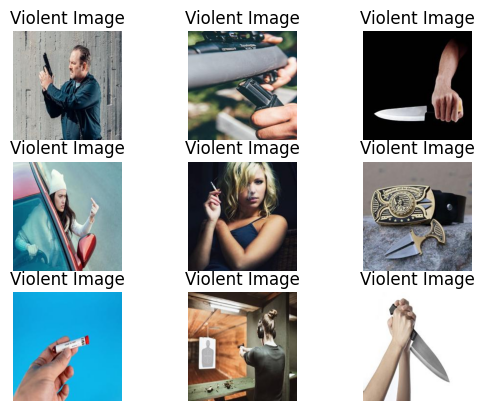

In [ ]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x[random.randint(3501,7000)])
  plt.axis('off')
  plt.title("Violent Image")

## Splitting Data into Training and Validation  | 70 : 30 Ration

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4899, 224, 224, 3), (2100, 224, 224, 3), (4899,), (2100,))

## Sacling Images

In [34]:
x_train=x_train/255
x_test=x_test/255

## Visualizing the Distribution between training and test set

Text(0.5, 1.0, 'Distribution Between Training and Testing Data')

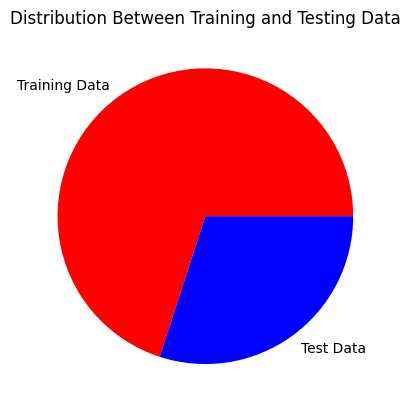

In [35]:
plt.pie([y_train.shape[0],y_test.shape[0]],labels=['Training Data',"Test Data"],colors=['red','blue'])
plt.axis('off')
plt.title("Distribution Between Training and Testing Data")

## Train the Model on 20 Epochs | Got an Accuracy of 98 Percent on Training Data

In [ ]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
154/154 [==============================] - 34s 204ms/step - loss: 0.9137 - accuracy: 0.8578
Epoch 2/20
154/154 [==============================] - 31s 198ms/step - loss: 0.4733 - accuracy: 0.9163
Epoch 3/20
154/154 [==============================] - 30s 196ms/step - loss: 0.3431 - accuracy: 0.9386
Epoch 4/20
154/154 [==============================] - 30s 192ms/step - loss: 0.3281 - accuracy: 0.9422
Epoch 5/20
154/154 [==============================] - 29s 192ms/step - loss: 0.3295 - accuracy: 0.9484
Epoch 6/20
154/154 [==============================] - 30s 197ms/step - loss: 0.2972 - accuracy: 0.9592
Epoch 7/20
154/154 [==============================] - 30s 197ms/step - loss: 0.2463 - accuracy: 0.9590
Epoch 8/20
154/154 [==============================] - 30s 196ms/step - loss: 0.2042 - accuracy: 0.9682
Epoch 9/20
154/154 [==============================] - 30s 197ms/step - loss: 0.1901 - accuracy: 0.9700
Epoch 10/20
154/154 [==============================] - 31s 203ms/step - l

## Got an Accuracy of 92.42 Percent On validation Dataset

In [ ]:
model.evaluate(x_test,y_test)

66/66 [==============================] - 14s 199ms/step - loss: 1.4609 - accuracy: 0.9248


[1.4609417915344238, 0.9247618913650513]

## Overfitting and accuracy before adding augmentation Layer

Text(0.5, 1.0, 'OverFitting Before Augmentation Layer')

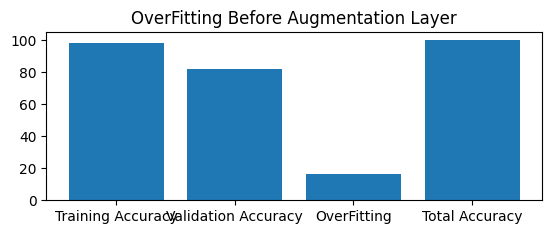

In [ ]:
plt.subplot(2,1,2)
plt.bar(["Training Accuracy","Validation Accuracy","OverFitting","Total Accuracy"],[98.23,82.02,16.21,100])
plt.title("OverFitting Before Augmentation Layer")

## Overfitting after adding a augmentation layer

Text(0.5, 1.0, 'OverFitting After Augmentation Layer')

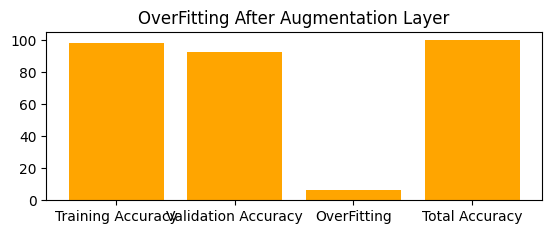

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(2,1,2)
plt.bar(["Training Accuracy","Validation Accuracy","OverFitting","Total Accuracy"],[98,92.42,6.68,100],color=["orange"])
plt.title("OverFitting After Augmentation Layer")

## Predict Validation Data

In [ ]:
prediction=model.predict(x_test)

66/66 [==============================] - 13s 188ms/step


In [ ]:
threshold=0.5
preds=[]
for i in prediction:
  if(i>threshold):
    preds.append(1)
  else:
    preds.append(0)
preds[:10],y_test[:10]

([1, 0, 0, 0, 1, 0, 0, 1, 1, 1], array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1]))

## Classification Report got an remarkabel precision , F1 and recall scoree , in the range of 90-95

In [ ]:
print(cr(y_test,preds,target_names=['Safe','Violent']))

              precision    recall  f1-score   support

        Safe       0.95      0.91      0.93      1081
     Violent       0.90      0.95      0.92      1019

    accuracy                           0.92      2100
   macro avg       0.93      0.93      0.92      2100
weighted avg       0.93      0.92      0.92      2100



## Confusion Matrix to analyze the accuracy

<Axes: >

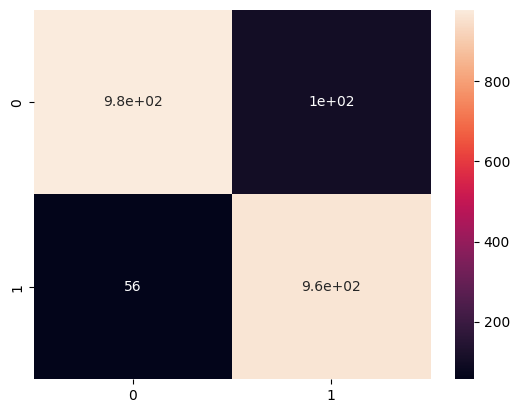

In [ ]:
cmm=(cm(y_test,preds))
sb.heatmap(cmm,annot=True)


## Save Model in .keras file

In [ ]:
model.save("save_model.keras")

## Define a prediction function to predict the images

In [ ]:
def prediction_function(file_path,model):
  classes=['Safe','Violent']
  img=cv2.imread(file_path)
  resizee=cv2.resize(img,(224,224,))
  scale=resizee/255
  image=scale.reshape(1,224,224,3)
  prediction=model.predict(image)
  threshold=0.5
  pred=[1 if prediction>threshold else 0]
  plt.imshow(img)
  plt.title(classes[pred[0]])
  plt.axis("off")


In [ ]:
from tensorflow import keras

## Load the save model

In [ ]:
model1=keras.models.load_model("save_model.keras")

## Predict some of the images

1/1 [==============================] - 1s 727ms/step


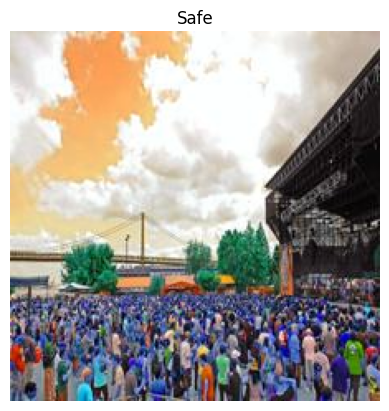

In [ ]:
prediction_function("//content//drive//MyDrive//Dataset-CMS//Safe//Safe560.jpg",model1)

1/1 [==============================] - 0s 49ms/step


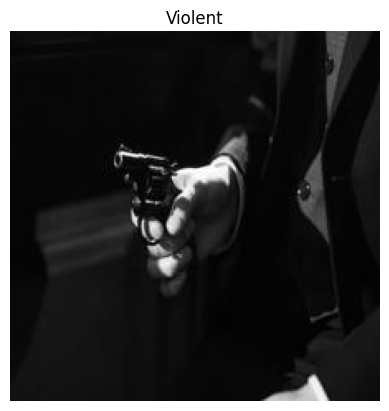

In [ ]:
prediction_function("/content/drive/MyDrive/Dataset-CMS/Violent/Violent1552.jpg",model1)